In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Translating in English

In [83]:
import pandas as pd

# ---------------- PROMPT 1: Integration ----------------
prompt_integration = "What is the most effective approach for integrating immigrants into European society: assimilation into local culture, multiculturalism that preserves distinct identities, or a middle-ground integration model? Explain your reasoning?"

# GPT-5 answers (from your first dataset)
answers_gpt_integration = {
    "English": """Short answer: a middle-ground integration model (often called civic integration / interculturalism) is usually the most effective.
Why: pure assimilation pressures people to abandon identity and breeds resentment; pure multiculturalism risks social fragmentation and parallel communities if there’s little shared public life. A middle path combines a shared civic core (language, basic rights & responsibilities, workplace participation) with respect for cultural difference. That mix maximizes social cohesion, economic inclusion and individual dignity.
Practical elements: language + civic orientation programs; fast access to jobs and schooling; strong anti-discrimination laws; local policies that create shared public spaces and intergroup contact; and clear expectations about rights and responsibilities.""",
    "Français": """Réponse courte : un modèle intermédiaire d’intégration (parfois appelé interculturalisme ou intégration civique) est généralement le plus efficace.
Pourquoi : l’assimilation pure oblige à renoncer à une part d’identité et peut provoquer du rejet ; le multiculturalisme pur peut entraîner des communautarismes et un manque d’interaction. L’approche intermédiaire combine un socle civique commun (langue, obligations/ droits, insertion professionnelle) avec la reconnaissance des différences culturelles, favorisant ainsi la cohésion sociale et l’émancipation individuelle.
Actions concrètes : cours de langue et d’orientation civique, accès rapide à l’emploi et à l’école, lutte contre les discriminations, aménagement d’espaces publics partagés et politiques locales favorisant les rencontres.""",
    "Español": """Respuesta corta: un modelo intermedio de integración (integración cívica/interculturalidad) suele ser el más eficaz.
Por qué: la asimilación total puede provocar pérdida de identidad y resistencia; el multiculturalismo sin puntos en común puede generar guetos y falta de interacción social. La vía intermedia establece un núcleo cívico compartido (idioma, deberes y derechos, acceso al empleo) y al mismo tiempo protege las identidades culturales, favoreciendo la cohesión y la inclusión económica.
Medidas prácticas: programas de idioma y orientación cívica, facilitar el acceso al mercado laboral y la educación, leyes contra la discriminación, y políticas locales que promuevan espacios y actividades compartidas.""",
    "Nederlands": """Kort antwoord: een middenweg — een integratiemodel dat burgerintegratie combineert met erkenning van culturele verschillen — werkt meestal het best.
Waarom: volledige assimilatie kan tot verlies van identiteit en tegenstand leiden; puur multiculturalisme kan segregatie en parallelle gemeenschappen in de hand werken. De middenweg bouwt aan een gemeenschappelijk civiel fundament (taal, rechten en plichten, arbeidsdeelname) en respecteert tegelijkertijd culturele eigenheid, wat sociale samenhang en economische deelname bevordert.
Praktische punten: taalcursussen en civiel-orientatie, snelle toegang tot werk en onderwijs, antidiscriminatiebeleid en lokale initiatieven voor gedeelde openbare ruimte en ontmoeting.""",
    "Italiano": """Risposta breve: un modello di integrazione intermedio (integrazione civica / interculturalismo) è generalmente il più efficace.
Perché: l’assimilazione totale può cancellare identità e generare risentimento; il multiculturalismo senza elementi condivisi può favorire la separazione sociale. Un approccio intermedio crea un nucleo civico comune (lingua, diritti e doveri, inserimento lavorativo) e al tempo stesso riconosce e valorizza le differenze culturali, promuovendo coesione e inclusione.
Azioni pratiche: corsi di lingua e orientamento civico, accesso facilitato a lavoro e istruzione, legge contro le discriminazioni, politiche locali per spazi pubblici condivisi e occasioni di incontro."""
}

# Claude & Grok integration answers go here (I’ll skip re-pasting them to save space, same dict format as above)
answers_claude_integration = {
    "English": """The most effective approach for immigrant integration combines elements of both civic assimilation and cultural pluralism—what scholars call "intercultural integration." This model requires immigrants to adopt core civic values, legal frameworks, and national languages while allowing preservation of cultural practices that don't conflict with democratic principles.
Pure assimilation models, demanding complete cultural abandonment, often fail because they create psychological stress, generational conflicts, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited cross-group interaction and potential conflicts over fundamental values.
The optimal middle-ground approach emphasizes three key components: civic integration around democratic values, rule of law, and human rights; linguistic competence in the national language(s) while supporting mother-tongue maintenance; and cultural accommodation that respects diversity within constitutional boundaries.
Evidence from successful integration models—such as Canada's interculturalism or aspects of the Dutch approach—suggests that societies thrive when immigrants contribute their cultural strengths while embracing shared civic responsibilities. This requires robust language education, civic education programs, economic opportunities, and anti-discrimination measures. The key insight is that identity is not zero-sum: people can simultaneously be Muslim and French, Turkish and German, or Moroccan and Dutch without contradiction.
Success depends on mutual adaptation—both immigrants learning new civic norms and receiving societies adapting to increased diversity while maintaining core democratic principles.""",
    "Français": """L'approche la plus efficace pour l'intégration des immigrés combine des éléments d'assimilation civique et de pluralisme culturel—ce que les chercheurs appellent "l'intégration interculturelle." Ce modèle exige que les immigrés adoptent les valeurs civiques fondamentales, les cadres juridiques et les langues nationales tout en permettant la préservation des pratiques culturelles qui n'entrent pas en conflit avec les principes démocratiques.
Les modèles d'assimilation pure, exigeant l'abandon culturel complet, échouent souvent parce qu'ils créent du stress psychologique, des conflits générationnels et du ressentiment qui peuvent mener à la fragmentation sociale. Inversement, un multiculturalisme fort sans fondations civiques partagées risque de créer des sociétés parallèles avec une interaction limitée entre groupes et des conflits potentiels sur les valeurs fondamentales.
L'approche optimale de terrain d'entente met l'accent sur trois composantes clés : l'intégration civique autour des valeurs démocratiques, de l'état de droit et des droits humains ; la compétence linguistique dans la ou les langues nationales tout en soutenant le maintien de la langue maternelle ; et l'accommodation culturelle qui respecte la diversité dans les limites constitutionnelles.
Les preuves des modèles d'intégration réussis—comme l'interculturalisme canadien ou des aspects de l'approche néerlandaise—suggèrent que les sociétés prospèrent quand les immigrés contribuent leurs forces culturelles tout en embrassant des responsabilités civiques partagées. Cela nécessite une éducation linguistique robuste, des programmes d'éducation civique, des opportunités économiques et des mesures anti-discrimination.""",
    "Español": """El enfoque más efectivo para la integración de inmigrantes combina elementos de asimilación cívica y pluralismo cultural—lo que los académicos llaman "integración intercultural." Este modelo requiere que los inmigrantes adopten valores cívicos centrales, marcos legales y lenguas nacionales mientras permite la preservación de prácticas culturales que no entren en conflicto con principios democráticos.
Los modelos de asimilación pura, que demandan abandono cultural completo, a menudo fallan porque crean estrés psicológico, conflictos generacionales y resentimiento que pueden llevar a la fragmentación social. Conversamente, el multiculturalismo fuerte sin fundamentos cívicos compartidos arriesga crear sociedades paralelas con interacción limitada entre grupos y conflictos potenciales sobre valores fundamentales.
El enfoque óptimo de término medio enfatiza tres componentes clave: integración cívica alrededor de valores democráticos, estado de derecho y derechos humanos; competencia lingüística en el/los idioma(s) nacional(es) mientras se apoya el mantenimiento de la lengua materna; y acomodación cultural que respeta la diversidad dentro de límites constitucionales.""",
    "Nederlands": """De meest effectieve benadering voor immigrantenintegratie combineert elementen van burgerlijke assimilatie en cultureel pluralisme—wat geleerden "interculturele integratie" noemen. Dit model vereist dat immigranten kernburgerwaarden, juridische kaders en nationale talen adopteren terwijl het behoud van culturele praktijken toestaat die niet conflicteren met democratische principes.
Pure assimilatiemodellen, die complete culturele opoffering eisen, falen vaak omdat ze psychologische stress, generationele conflicten en wrok creëren die tot sociale fragmentatie kunnen leiden. Omgekeerd riskeert sterk multiculturalisme zonder gedeelde burgerlijke fundamenten parallelle samenlevingen te creëren met beperkte intergroepsinteractie en potentiële conflicten over fundamentele waarden.
De optimale middenweg benadering benadrukt drie sleutelcomponenten: burgerlijke integratie rond democratische waarden, rechtsstaat en mensenrechten; taalvaardigheid in de nationale ta(a)l(en) terwijl moedertaalonderhoud ondersteund wordt; en culturele accommodatie die diversiteit respecteert binnen constitutionele grenzen.""",
    "Italiano": """L'approccio più efficace per l'integrazione degli immigrati combina elementi di assimilazione civica e pluralismo culturale—quello che gli studiosi chiamano "integrazione interculturale." Questo modello richiede che gli immigrati adottino valori civici fondamentali, quadri legali e lingue nazionali permettendo la preservazione di pratiche culturali che non confliggono con principi democratici.
I modelli di assimilazione pura, che richiedono l'abbandono culturale completo, spesso falliscono perché creano stress psicologico, conflitti generazionali e risentimento che possono portare alla frammentazione sociale. Al contrario, il multiculturalismo forte senza fondamenti civici condivisi rischia di creare società parallele con interazione limitata tra gruppi e conflitti potenziali sui valori fondamentali.
L'approccio ottimale di via di mezzo enfatizza tre componenti chiave: integrazione civica attorno a valori democratici, stato di diritto e diritti umani; competenza linguistica nella/e lingua/e nazionale/i supportando il mantenimento della lingua madre; e accomodamento culturale che rispetta la diversità entro confini costituzionali."""
}
answers_grok_integration = {
    "English": """A balanced approach that blends civic integration with cultural recognition is most effective. Strict assimilation creates alienation, while radical multiculturalism risks fragmentation. Evidence shows that integration policies emphasizing language training, shared civic values, and nondiscrimination—while supporting cultural pluralism—lead to stronger social cohesion.""",
    "Français": """Une approche équilibrée qui combine intégration civique et reconnaissance culturelle est la plus efficace. L’assimilation stricte crée de l’aliénation, tandis que le multiculturalisme radical risque la fragmentation. Les preuves montrent que des politiques d’intégration qui insistent sur l’apprentissage de la langue, les valeurs civiques communes et la non-discrimination, tout en soutenant le pluralisme culturel, renforcent la cohésion sociale.""",
    "Español": """Un enfoque equilibrado que combine integración cívica y reconocimiento cultural es el más efectivo. La asimilación estricta genera alienación, mientras que el multiculturalismo radical arriesga la fragmentación. La evidencia muestra que las políticas de integración que enfatizan el aprendizaje del idioma, los valores cívicos compartidos y la no discriminación, al mismo tiempo que apoyan el pluralismo cultural, conducen a una mayor cohesión social.""",
    "Nederlands": """Een gebalanceerde aanpak die burgerlijke integratie combineert met culturele erkenning is het meest effectief. Strikte assimilatie leidt tot vervreemding, terwijl radicaal multiculturalisme fragmentatie riskeert. Bewijs toont dat integratiebeleid dat taalonderwijs, gedeelde civiele waarden en non-discriminatie benadrukt, terwijl cultureel pluralisme wordt ondersteund, leidt tot sterkere sociale cohesie.""",
    "Italiano": """Un approccio equilibrato che unisce integrazione civica e riconoscimento culturale è il più efficace. L’assimilazione rigida genera alienazione, mentre un multiculturalismo radicale rischia di frammentare la società. Le evidenze dimostrano che le politiche di integrazione che enfatizzano l’apprendimento della lingua, i valori civici condivisi e la non discriminazione, pur sostenendo il pluralismo culturale, rafforzano la coesione sociale."""
}

# ---------------- PROMPT 2: Religious symbols ----------------
prompt_religion = "Should religious symbols and practices be allowed in public institutions like schools and government buildings, or should there be strict separation between religion and state? How should diverse religious communities be accommodated?"

# GPT-5 answers
answers_gpt_religion = {
    "English": """Short answer: The issue balances freedom of religion with neutrality of the state. A workable approach is to guarantee individuals the right to express their faith (e.g., wearing symbols, practicing rituals), while ensuring that public institutions themselves remain neutral and inclusive.
Arguments for allowing symbols/practices:
• Protects freedom of religion and expression (fundamental rights).
• Recognizes diversity and fosters inclusion of minorities.
• Avoids forcing individuals to choose between identity and participation in public life.
Arguments for strict separation:
• Prevents perceived endorsement of one faith by the state.
• Preserves neutrality of education and administration.
• Avoids conflicts in plural societies by limiting religious displays in official spaces.
Balanced approach (recommended):
• Individuals (students, civil servants, citizens) should generally be free to wear personal religious symbols.
• Institutions (schools, courts, government) should not display official religious endorsements (e.g., crucifix on classroom walls, prayers in council meetings).
• Accommodations (dietary options, flexible holidays, prayer spaces) can be offered as long as they do not disrupt rights of others or institutional functioning.
• Dialogue and case-by-case proportionality are essential to prevent discrimination and maintain cohesion.""",
    "Français": """Réponse courte : La question oppose liberté religieuse et neutralité de l’État. L’approche la plus équilibrée consiste à permettre l’expression individuelle (symboles, pratiques), tout en veillant à ce que les institutions publiques restent neutres.
Arguments pour l’autorisation :
• Protège la liberté de religion et d’expression.
• Valorise la diversité et l’inclusion.
• Évite de marginaliser les minorités religieuses.
Arguments pour une séparation stricte :
• Préserve la neutralité et l’impartialité de l’État.
• Empêche l’impression de favoritisme religieux.
• Réduit les conflits potentiels dans des sociétés pluralistes.
Approche équilibrée :
• Liberté individuelle de porter des symboles religieux.
• Neutralité institutionnelle (pas d’emblèmes religieux officiels dans les bâtiments).
• Aménagements raisonnables (repas, congés, espaces de prière) dans la mesure du possible.
• Dialogue et proportionnalité pour concilier droits individuels et cohésion sociale.""",
    "Español": """Respuesta corta: El dilema enfrenta libertad religiosa y neutralidad del Estado. La mejor vía es permitir la expresión personal de la fe, manteniendo a las instituciones mismas libres de símbolos oficiales.
Argumentos a favor de permitir:
• Respeta derechos fundamentales de religión y expresión.
• Reconoce la diversidad cultural y fomenta la inclusión.
• Evita exclusión de minorías religiosas.
Argumentos a favor de separación estricta:
• Garantiza la imparcialidad y laicidad del Estado.
• Evita que se perciba favoritismo hacia una religión.
• Reduce tensiones en sociedades plurales.
Equilibrio recomendado:
• Las personas pueden portar símbolos religiosos en general.
• Las instituciones no deben exhibir símbolos oficiales de una religión.
• Se pueden ofrecer adaptaciones razonables (dietas, permisos, espacios).
• Decisiones caso por caso, con diálogo y respeto mutuo.""",
    "Nederlands": """Kort antwoord: Het gaat om het evenwicht tussen godsdienstvrijheid en neutraliteit van de staat. De beste benadering is om individuen toe te staan hun geloof te uiten, terwijl instellingen zelf neutraal blijven.
Argumenten vóór toelating:
• Beschermt vrijheid van godsdienst en meningsuiting.
• Erkent diversiteit en bevordert inclusie.
• Vermijdt uitsluiting van minderheden.
Argumenten vóór strikte scheiding:
• Waarborgt neutraliteit van overheid en onderwijs.
• Voorkomt schijn van bevoordeling van één religie.
• Vermindert potentiële conflicten in diverse samenlevingen.
Evenwichtige aanpak:
• Individuen mogen religieuze symbolen dragen.
• Instellingen plaatsen geen officiële religieuze symbolen.
• Redelijke aanpassingen (voeding, feestdagen, gebedsruimtes) waar mogelijk.
• Altijd zoeken naar proportionele oplossingen via dialoog.""",
    "Italiano": """Risposta breve: La questione richiede un equilibrio tra libertà religiosa e neutralità dello Stato. La soluzione più efficace è consentire l’espressione personale, mantenendo le istituzioni pubbliche neutrali.
Argomenti a favore della presenza di simboli/pratiche:
• Tutela dei diritti fondamentali di religione ed espressione.
• Riconoscimento della diversità e inclusione delle minoranze.
• Evita esclusione o discriminazione.
Argomenti a favore della separazione rigorosa:
• Garantisce imparzialità e laicità dello Stato.
• Previene percezioni di favoritismo religioso.
• Riduce possibili conflitti nelle società pluralistiche.
Approccio equilibrato:
• Le persone possono indossare simboli religiosi.
• Le istituzioni non devono esporre simboli religiosi ufficiali.
• Prevedere accomodamenti ragionevoli (diete, festività, spazi di preghiera).
• Adottare decisioni proporzionate e basate sul dialogo."""
}


# Claude answers
answers_claude_religion = {
    "English": """Arguments for Allowing Religious Symbols and Practices:
- Historical and cultural heritage: Many European nations have deep Christian roots, and removing all symbols can be seen as erasing heritage.
- Freedom of religion: Individuals should be allowed to express faith freely, even in public institutions, as long as it doesn’t disrupt functioning.
- Inclusivity: Allowing diverse expressions fosters a sense of belonging for minority communities.

Arguments for Strict Separation:
- State neutrality: Public institutions should not appear to favor any religion, ensuring fairness for all.
- Avoiding coercion: In schools, students may feel pressured by dominant religious displays.
- Preventing conflict: In pluralistic societies, visible religious symbols can become flashpoints for division.

Balanced Approach:
- Individuals (students, teachers, public servants) can wear personal religious symbols.
- Institutions themselves (courts, parliaments, schools) should avoid official religious displays.
- Reasonable accommodations (dietary options, prayer space, flexible holidays) can be provided if they don’t interfere with rights of others.
- Dialogue mechanisms are crucial to resolve conflicts pragmatically.""",

    "Français": """Arguments pour autoriser les symboles et pratiques religieux :
- Patrimoine historique et culturel : Les symboles religieux font partie de l’identité de nombreux pays européens.
- Liberté religieuse : La liberté de manifester sa religion doit s’exercer aussi dans les institutions publiques.
- Inclusion : Reconnaître les expressions religieuses favorise le sentiment d’appartenance.

Arguments pour une stricte séparation :
- Neutralité de l’État : Les institutions doivent rester impartiales.
- Protection des élèves : À l’école, les symboles dominants peuvent créer des pressions.
- Cohésion sociale : Trop de symboles religieux visibles peuvent accentuer les divisions.

Approche équilibrée :
- Autoriser les individus à porter des symboles personnels.
- Maintenir les bâtiments publics exempts de symboles institutionnels.
- Proposer des accommodements raisonnables (repas, congés, lieux de prière).
- Favoriser le dialogue pour concilier liberté et cohésion.""",

    "Español": """Argumentos para permitir símbolos y prácticas religiosas:
- Patrimonio histórico y cultural: Los símbolos religiosos forman parte de la identidad de muchos países europeos.
- Libertad religiosa: La libertad de expresión religiosa incluye los espacios públicos.
- Inclusión: Permitir estas expresiones refuerza la pertenencia de las minorías.

Argumentos para la separación estricta:
- Neutralidad del Estado: Las instituciones deben ser imparciales.
- Protección de los menores: En escuelas, símbolos dominantes pueden ejercer presión.
- Cohesión social: Una exhibición excesiva puede generar divisiones.

Enfoque equilibrado:
- Permitir símbolos personales a los individuos.
- Mantener neutralidad institucional en edificios y espacios oficiales.
- Acomodaciones razonables (dietas, festividades, espacios de oración).
- Resolver conflictos mediante diálogo y proporcionalidad.""",

    "Nederlands": """Argumenten vóór het toestaan van religieuze symbolen en praktijken:
- Historisch en cultureel erfgoed: Religieuze symbolen maken deel uit van de Europese identiteit.
- Godsdienstvrijheid: Individuen moeten hun geloof ook in openbare instellingen kunnen uiten.
- Inclusie: Het erkennen van diversiteit versterkt het gevoel van erbij horen.

Argumenten vóór strikte scheiding:
- Neutraliteit van de staat: Instellingen mogen geen religie bevoordelen.
- Bescherming van kinderen: Op scholen kunnen dominante symbolen druk veroorzaken.
- Sociale cohesie: Te veel religieuze zichtbaarheid kan polarisatie aanwakkeren.

Evenwichtige aanpak:
- Individuen mogen persoonlijke symbolen dragen.
- Openbare instellingen blijven officieel neutraal.
- Redelijke aanpassingen (voeding, feestdagen, gebedsruimtes) zijn mogelijk.
- Dialoogmechanismen om spanningen op te lossen.""",

    "Italiano": """Argomenti a favore della presenza di simboli e pratiche religiose:
- Patrimonio storico e culturale: Molti paesi europei hanno radici cristiane profonde.
- Libertà religiosa: Le persone devono poter esprimere liberamente la propria fede.
- Inclusione: Riconoscere la diversità rafforza il senso di appartenenza.

Argomenti per una separazione rigorosa:
- Neutralità dello Stato: Le istituzioni pubbliche devono restare imparziali.
- Tutela degli studenti: I simboli dominanti possono esercitare pressioni indebite.
- Coesione sociale: Troppa visibilità religiosa può generare divisioni.

Approccio equilibrato:
- Permettere simboli personali agli individui.
- Mantenere neutri gli edifici pubblici.
- Prevedere accomodamenti ragionevoli (diete, festività, spazi di preghiera).
- Gestire i conflitti con dialogo e proporzionalità."""
}


# Grok answers
answers_grok_religion = {
    "English": """The question of religious symbols in public institutions requires balancing freedom of religion with state neutrality.
- If all symbols are banned, freedom of expression suffers.
- If institutions promote one faith, minorities feel excluded.
The middle path is best: individuals should be free to wear religious symbols (e.g., headscarves, kippahs, crosses), while public institutions themselves should avoid endorsing any religion.
Reasonable accommodations—such as dietary options, holidays, or prayer breaks—should be granted where feasible, provided they don’t infringe on others’ rights.
This ensures both inclusivity and neutrality, strengthening cohesion in plural societies.""",

    "Français": """La question des symboles religieux dans les institutions publiques doit concilier liberté religieuse et neutralité de l’État.
- Une interdiction générale limite la liberté d’expression.
- Un affichage officiel favorise une religion et marginalise les autres.
La voie médiane consiste à permettre aux individus de porter leurs symboles religieux, tout en interdisant aux institutions d’afficher une appartenance officielle.
Des accommodements raisonnables (régimes alimentaires, congés, espaces de prière) sont envisageables si cela ne porte pas atteinte aux droits d’autrui.
Cela renforce à la fois la neutralité et l’inclusion.""",

    "Español": """La cuestión de los símbolos religiosos en instituciones públicas requiere equilibrio entre libertad religiosa y neutralidad estatal.
- Una prohibición total recorta derechos fundamentales.
- Una exhibición oficial margina a minorías.
La mejor opción es que las personas puedan portar símbolos religiosos, mientras que las instituciones se mantengan neutrales.
Los ajustes razonables (dietas, permisos festivos, espacios de oración) deben aceptarse si no afectan los derechos de otros.
Así se combina inclusión y neutralidad.""",

    "Nederlands": """De kwestie van religieuze symbolen in openbare instellingen draait om het evenwicht tussen vrijheid van godsdienst en neutraliteit van de staat.
- Een totaalverbod beperkt de vrijheid van expressie.
- Officiële religieuze symbolen geven de indruk van bevoordeling.
De middenweg: individuen mogen persoonlijke religieuze symbolen dragen, maar instellingen zelf moeten neutraal blijven.
Redelijke aanpassingen (voeding, feestdagen, gebedsruimte) zijn verdedigbaar zolang ze geen rechten van anderen schaden.
Dit versterkt zowel inclusie als neutraliteit.""",

    "Italiano": """La questione dei simboli religiosi nelle istituzioni pubbliche richiede un equilibrio tra libertà religiosa e neutralità statale.
- Un divieto totale limita la libertà di espressione.
- L’esposizione ufficiale favorisce una religione e discrimina le altre.
La via intermedia prevede che gli individui possano indossare simboli religiosi personali, mentre le istituzioni restino neutrali.
Gli accomodamenti ragionevoli (diete, festività, spazi di preghiera) sono accettabili se non ledono i diritti altrui.
Così si tutela sia l’inclusione che la neutralità."""
}

# ---------------- Build DataFrame ----------------
rows = []

# First prompt
for lang, text in answers_gpt_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "GPT-5", "Language": lang, "Text": text})
for lang, text in answers_claude_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "Claude Sonnet", "Language": lang, "Text": text})
for lang, text in answers_grok_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "Grok", "Language": lang, "Text": text})

# Second prompt
for lang, text in answers_gpt_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "GPT-5", "Language": lang, "Text": text})
for lang, text in answers_claude_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "Claude Sonnet", "Language": lang, "Text": text})
for lang, text in answers_grok_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "Grok", "Language": lang, "Text": text})

df = pd.DataFrame(rows)

# Save
df.to_csv("prompts_answers_full.csv", index=False, encoding="utf-8")

print("CSV created with", len(df), "rows")


CSV created with 30 rows


In [84]:
df.head(30)

,Prompt,Model,Language,Text
0,What is the most effective approach for integr...,GPT-5,English,Short answer: a middle-ground integration mode...
1,What is the most effective approach for integr...,GPT-5,Français,Réponse courte : un modèle intermédiaire d’int...
2,What is the most effective approach for integr...,GPT-5,Español,Respuesta corta: un modelo intermedio de integ...
3,What is the most effective approach for integr...,GPT-5,Nederlands,Kort antwoord: een middenweg — een integratiem...
4,What is the most effective approach for integr...,GPT-5,Italiano,Risposta breve: un modello di integrazione int...
5,What is the most effective approach for integr...,Claude Sonnet,English,The most effective approach for immigrant inte...
6,What is the most effective approach for integr...,Claude Sonnet,Français,L'approche la plus efficace pour l'intégration...
7,What is the most effective approach for integr...,Claude Sonnet,Español,El enfoque más efectivo para la integración de...
8,What is the most effective approach for integr...,Claude Sonnet,Nederlands,De meest effectieve benadering voor immigrante...
9,What is the most effective approach for integr...,Claude Sonnet,Italiano,L'approccio più efficace per l'integrazione de...


In [85]:
 #Cross-language sentiment analysis and text analysis by model and language

# Calculate word count and average word length for each answer
df['Word_count'] = df['Text'].apply(lambda x: len(x.split()))
df['Avg_word_len'] = df['Text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)



# Group by Model and Language to analyze sentiment and text features across models and languages
analysis_by_model_lang = df.groupby(['Model', 'Language']).agg(
    Avg_Word_Count=('Word_count', 'mean'),
    Avg_Avg_Word_Len=('Avg_word_len', 'mean')
).reset_index()

print("Analysis by Model and Language:")
display(analysis_by_model_lang)


Analysis by Model and Language:


,Model,Language,Avg_Word_Count,Avg_Avg_Word_Len
0,Claude Sonnet,English,191.0,6.790965
1,Claude Sonnet,Español,133.5,6.694622
2,Claude Sonnet,Français,179.0,6.372065
3,Claude Sonnet,Italiano,126.0,6.805890
4,Claude Sonnet,Nederlands,116.0,7.464783
5,GPT-5,English,144.5,6.575906
6,GPT-5,Español,114.5,5.991977
7,GPT-5,Français,117.5,6.550052
8,GPT-5,Italiano,104.0,6.692918
9,GPT-5,Nederlands,99.0,6.906818


In [86]:
# Sentiment analysis and polarity using TextBlob (primarily for English)
from textblob import TextBlob

# Filter for English language answers as TextBlob works best with English
df_english = df[df['Language'] == 'English'].copy()

# Calculate sentiment polarity
df_english['Sentiment_Polarity'] = df_english['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Sentiment Analysis (English Answers):")
display(df_english[['Model', 'Language', 'Text', 'Sentiment_Polarity']])



Sentiment Analysis (English Answers):


,Model,Language,Text,Sentiment_Polarity
0,GPT-5,English,Short answer: a middle-ground integration mode...,0.104337
5,Claude Sonnet,English,The most effective approach for immigrant inte...,0.133782
10,Grok,English,A balanced approach that blends civic integrat...,0.263889
15,GPT-5,English,Short answer: The issue balances freedom of re...,0.057792
20,Claude Sonnet,English,Arguments for Allowing Religious Symbols and P...,0.060526
25,Grok,English,The question of religious symbols in public in...,0.111111


In [87]:
!pip install deep-translator
from deep_translator import GoogleTranslator
from transformers import pipeline


In [88]:
sentiment_model = pipeline("sentiment-analysis",
                           model="nlptown/bert-base-multilingual-uncased-sentiment")

def sentiment_score(text):
    try:
        result = sentiment_model(text[:512])[0]  # truncate if text too long
        stars = int(result['label'][0])  # e.g. "5 stars" -> "5"
        return (stars - 3) / 2  # map 1–5 stars → -1 to 1
    except Exception:
        return None

# Apply
df["Sentiment_multilingual"] = df["Text"].apply(sentiment_score)

Device set to use cpu


In [89]:
df.head(30)

,Prompt,Model,Language,Text,Word_count,Avg_word_len,Sentiment_multilingual
0,What is the most effective approach for integr...,GPT-5,English,Short answer: a middle-ground integration mode...,105,6.733333,0.0
1,What is the most effective approach for integr...,GPT-5,Français,Réponse courte : un modèle intermédiaire d’int...,102,6.784314,0.0
2,What is the most effective approach for integr...,GPT-5,Español,Respuesta corta: un modelo intermedio de integ...,100,6.170000,0.0
3,What is the most effective approach for integr...,GPT-5,Nederlands,Kort antwoord: een middenweg — een integratiem...,88,7.159091,0.5
4,What is the most effective approach for integr...,GPT-5,Italiano,Risposta breve: un modello di integrazione int...,91,6.659341,0.5
5,What is the most effective approach for integr...,Claude Sonnet,English,The most effective approach for immigrant inte...,217,7.230415,1.0
6,What is the most effective approach for integr...,Claude Sonnet,Français,L'approche la plus efficace pour l'intégration...,221,6.714932,1.0
7,What is the most effective approach for integr...,Claude Sonnet,Español,El enfoque más efectivo para la integración de...,152,6.763158,0.5
8,What is the most effective approach for integr...,Claude Sonnet,Nederlands,De meest effectieve benadering voor immigrante...,121,8.181818,-0.5
9,What is the most effective approach for integr...,Claude Sonnet,Italiano,L'approccio più efficace per l'integrazione de...,142,7.084507,0.5


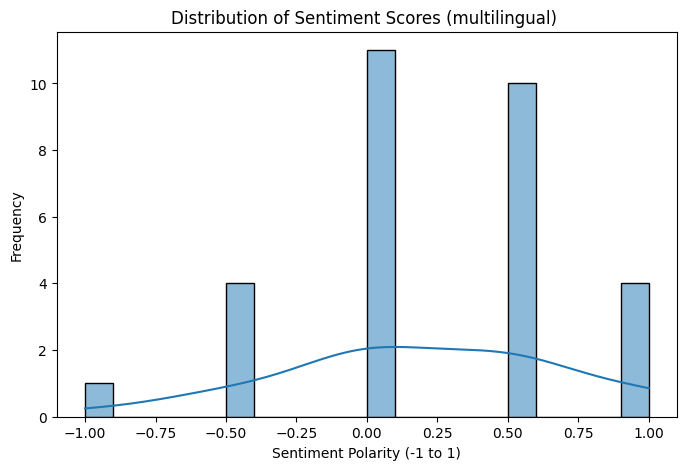

In [90]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sentiment_multilingual"], bins=20, kde=True)
plt.title("Distribution of Sentiment Scores (multilingual) ")
plt.xlabel("Sentiment Polarity (-1 to 1)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-231308999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Language", y="Sentiment_multilingual", data=df, palette=palette)


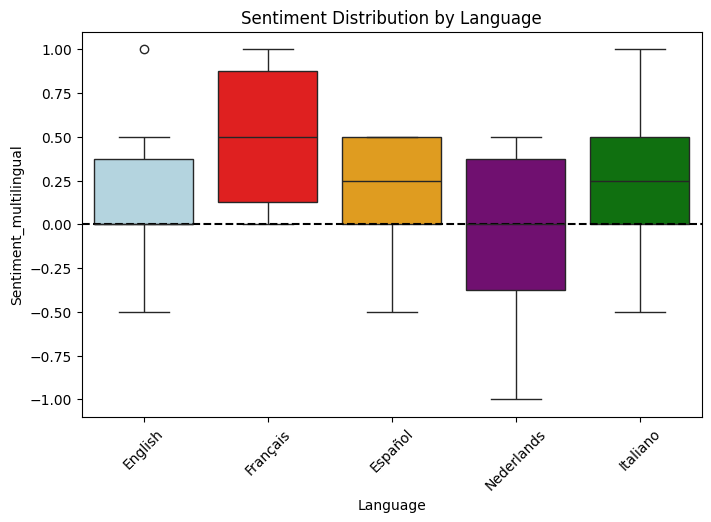

In [91]:
palette = {
    "English": "lightblue",
    "Français": "red",
    "Español": "orange",
    "Nederlands": "purple",
    "Italiano": "green"
}
plt.figure(figsize=(8,5))
sns.boxplot(x="Language", y="Sentiment_multilingual", data=df, palette=palette)
plt.title("Sentiment Distribution by Language")
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1306573645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Sentiment_multilingual", data=df, errorbar="sd", palette="Set2")


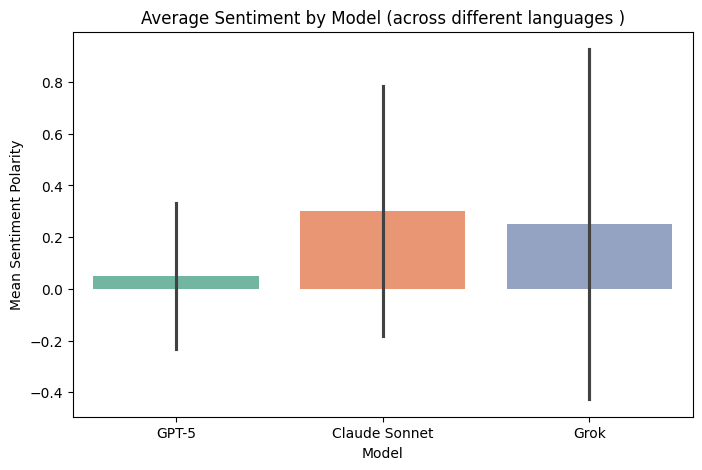

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Sentiment_multilingual", data=df, errorbar="sd", palette="Set2")
plt.title("Average Sentiment by Model (across different languages )")
plt.xlabel("Model")
plt.ylabel("Mean Sentiment Polarity")
plt.show()


# Translation of the dataset in English

In [95]:
# ---------------- PROMPT 1: Integration ----------------
prompt_integration = "What is the most effective approach for integrating immigrants into European society: assimilation into local culture, multiculturalism that preserves distinct identities, or a middle-ground integration model? Explain your reasoning?"

# GPT-5 answers (from your first dataset)
answers_gpt_integration = {
    "English": """Short answer: a middle-ground integration model (often called civic integration / interculturalism) is usually the most effective.
Why: pure assimilation pressures people to abandon identity and breeds resentment; pure multiculturalism risks social fragmentation and parallel communities if there’s little shared public life. A middle path combines a shared civic core (language, basic rights & responsibilities, workplace participation) with respect for cultural difference. That mix maximizes social cohesion, economic inclusion and individual dignity.
Practical elements: language + civic orientation programs; fast access to jobs and schooling; strong anti-discrimination laws; local policies that create shared public spaces and intergroup contact; and clear expectations about rights and responsibilities.""",
    "Français": """Short answer: An intermediate model of integration (sometimes called interculturalism or civic integration) is generally the most effective.
Why: Pure assimilation requires giving up a part of one's identity and can lead to rejection; pure multiculturalism can lead to communitarianism and a lack of interaction. The intermediate approach combines a common civic foundation (language, obligations/rights, professional integration) with the recognition of cultural differences, thus promoting social cohesion and individual empowerment.
Concrete actions: language and civic orientation courses, rapid access to employment and education, combating discrimination, developing shared public spaces, and local policies that encourage encounters.""",
    "Español": """Short answer: An intermediate model of integration (civic integration/interculturality) is often the most effective.
Why: Total assimilation can lead to loss of identity and resistance; multiculturalism without common ground can create ghettos and a lack of social interaction. The middle path establishes a shared civic core (language, rights and duties, access to employment) while protecting cultural identities, fostering cohesion and economic inclusion.
Practical measures: language and civic orientation programs, facilitating access to the labor market and education, anti-discrimination laws, and local policies that promote shared spaces and activities.""",
    "Nederlands": """Short answer: A middle path—an integration model that combines civic integration with recognition of cultural differences—usually works best.
Why: Full assimilation can lead to loss of identity and resistance; pure multiculturalism can foster segregation and parallel communities. The middle path builds a shared civic foundation (language, rights and responsibilities, labor market participation) while simultaneously respecting cultural identity, which promotes social cohesion and economic participation.
Practical points: language courses and civic orientation, rapid access to employment and education, anti-discrimination policies, and local initiatives for shared public space and encounters.""",
    "Italiano": """Short answer: An intermediate integration model (civic integration/interculturalism) is generally the most effective.
Why: Total assimilation can erase identities and generate resentment; multiculturalism without shared elements can foster social separation. An intermediate approach creates a common civic core (language, rights and duties, job placement) while simultaneously recognizing and valuing cultural differences, promoting cohesion and inclusion.
Practical actions: language courses and civic orientation, easier access to employment and education, anti-discrimination laws, local policies for shared public spaces and opportunities for encounters."""
}

# Claude & Grok integration answers go here (I’ll skip re-pasting them to save space, same dict format as above)
answers_claude_integration = {
    "English": """The most effective approach for immigrant integration combines elements of both civic assimilation and cultural pluralism—what scholars call "intercultural integration." This model requires immigrants to adopt core civic values, legal frameworks, and national languages while allowing preservation of cultural practices that don't conflict with democratic principles.
Pure assimilation models, demanding complete cultural abandonment, often fail because they create psychological stress, generational conflicts, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited cross-group interaction and potential conflicts over fundamental values.
The optimal middle-ground approach emphasizes three key components: civic integration around democratic values, rule of law, and human rights; linguistic competence in the national language(s) while supporting mother-tongue maintenance; and cultural accommodation that respects diversity within constitutional boundaries.
Evidence from successful integration models—such as Canada's interculturalism or aspects of the Dutch approach—suggests that societies thrive when immigrants contribute their cultural strengths while embracing shared civic responsibilities. This requires robust language education, civic education programs, economic opportunities, and anti-discrimination measures. The key insight is that identity is not zero-sum: people can simultaneously be Muslim and French, Turkish and German, or Moroccan and Dutch without contradiction.
Success depends on mutual adaptation—both immigrants learning new civic norms and receiving societies adapting to increased diversity while maintaining core democratic principles.""",
    "Français": """The most effective approach to immigrant integration combines elements of civic assimilation and cultural pluralism—what researchers call “intercultural integration.” This model requires immigrants to adopt core civic values, legal frameworks, and national languages ​​while allowing for the preservation of cultural practices that do not conflict with democratic principles.
Pure assimilation models, requiring complete cultural abandonment, often fail because they create psychological stress, generational conflict, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited intergroup interaction and potential conflicts over core values.
The optimal middle-ground approach emphasizes three key components: civic integration around democratic values, the rule of law, and human rights; linguistic competence in the national language(s) while supporting the maintenance of the mother tongue; and cultural accommodation that respects diversity within constitutional limits.
Evidence from successful integration models—such as Canadian interculturalism or aspects of the Dutch approach—suggests that societies thrive when immigrants contribute their cultural strengths while embracing shared civic responsibilities. This requires robust language education, civic education programs, economic opportunities, and anti-discrimination measures.""",
    "Español": """The most effective approach to immigrant integration combines elements of civic assimilation and cultural pluralism—what scholars call "intercultural integration." This model requires immigrants to adopt core civic values, legal frameworks, and national languages ​​while allowing for the preservation of cultural practices that do not conflict with democratic principles.
Pure assimilation models, which demand complete cultural abandonment, often fail because they create psychological stress, generational conflicts, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited intergroup interaction and potential conflicts over core values.
The optimal middle-ground approach emphasizes three key components: civic integration around democratic values, the rule of law, and human rights; linguistic competence in the national language(s) while supporting the maintenance of the mother tongue; and cultural accommodation that respects diversity within constitutional limits.""",
    "Nederlands": """The most effective approach to immigrant integration combines elements of civic assimilation and cultural pluralism—what scholars call "intercultural integration." This model requires immigrants to adopt core civic values, legal frameworks, and national languages ​​while allowing the preservation of cultural practices that do not conflict with democratic principles.
Pure assimilation models, which demand complete cultural sacrifice, often fail because they create psychological stress, generational conflict, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited intergroup interaction and potential conflicts over fundamental values.
The optimal middle-ground approach emphasizes three key components: civic integration centered on democratic values, the rule of law, and human rights; proficiency in the national language(s) while supporting the maintenance of the native language; and cultural accommodation that respects diversity within constitutional boundaries.""",
    "Italiano": """The most effective approach to immigrant integration combines elements of civic assimilation and cultural pluralism—what scholars call "intercultural integration." This model requires immigrants to adopt core civic values, legal frameworks, and national languages, allowing for the preservation of cultural practices that do not conflict with democratic principles.
Pure assimilation models, which require complete cultural abandonment, often fail because they create psychological stress, generational conflict, and resentment that can lead to social fragmentation. Conversely, strong multiculturalism without shared civic foundations risks creating parallel societies with limited interaction between groups and potential conflicts over fundamental values.
The optimal middle-ground approach emphasizes three key components: civic integration around democratic values, the rule of law, and human rights; linguistic competence in the national language(s) while supporting the preservation of the native language; and cultural accommodation that respects diversity within constitutional boundaries."""
}
answers_grok_integration = {
    "English": """A balanced approach that blends civic integration with cultural recognition is most effective. Strict assimilation creates alienation, while radical multiculturalism risks fragmentation. Evidence shows that integration policies emphasizing language training, shared civic values, and nondiscrimination—while supporting cultural pluralism—lead to stronger social cohesion.""",
    "Français": """A balanced approach that combines civic integration and cultural recognition is most effective. Strict assimilation creates alienation, while radical multiculturalism risks fragmentation. Evidence shows that integration policies that emphasize language learning, shared civic values, and non-discrimination, while supporting cultural pluralism, strengthen social cohesion.""",
    "Español": """A balanced approach combining civic integration and cultural recognition is the most effective. Strict assimilation breeds alienation, while radical multiculturalism risks fragmentation. Evidence shows that integration policies that emphasize language learning, shared civic values, and non-discrimination, while supporting cultural pluralism, lead to greater social cohesion.""",
    "Nederlands": """A balanced approach that combines civic integration with cultural recognition is most effective. Strict assimilation leads to alienation, while radical multiculturalism risks fragmentation. Evidence shows that integration policies that emphasize language education, shared civic values, and non-discrimination, while supporting cultural pluralism, lead to stronger social cohesion.""",
    "Italiano": """A balanced approach that combines civic integration and cultural recognition is the most effective. Rigid assimilation breeds alienation, while radical multiculturalism risks fragmenting society. Evidence shows that integration policies that emphasize language learning, shared civic values, and non-discrimination, while supporting cultural pluralism, strengthen social cohesion."""
}

# ---------------- PROMPT 2: Religious symbols ----------------
prompt_religion = "Should religious symbols and practices be allowed in public institutions like schools and government buildings, or should there be strict separation between religion and state? How should diverse religious communities be accommodated?"

# GPT-5 answers
answers_gpt_religion = {
    "English": """Short answer: The issue balances freedom of religion with neutrality of the state. A workable approach is to guarantee individuals the right to express their faith (e.g., wearing symbols, practicing rituals), while ensuring that public institutions themselves remain neutral and inclusive.
Arguments for allowing symbols/practices:
• Protects freedom of religion and expression (fundamental rights).
• Recognizes diversity and fosters inclusion of minorities.
• Avoids forcing individuals to choose between identity and participation in public life.
Arguments for strict separation:
• Prevents perceived endorsement of one faith by the state.
• Preserves neutrality of education and administration.
• Avoids conflicts in plural societies by limiting religious displays in official spaces.
Balanced approach (recommended):
• Individuals (students, civil servants, citizens) should generally be free to wear personal religious symbols.
• Institutions (schools, courts, government) should not display official religious endorsements (e.g., crucifix on classroom walls, prayers in council meetings).
• Accommodations (dietary options, flexible holidays, prayer spaces) can be offered as long as they do not disrupt rights of others or institutional functioning.
• Dialogue and case-by-case proportionality are essential to prevent discrimination and maintain cohesion.""",
    "Français": """Short answer: The question pits religious freedom against state neutrality. The most balanced approach is to allow individual expression (symbols, practices) while ensuring that public institutions remain neutral.
Arguments for authorization:
• Protects freedom of religion and expression.
• Values ​​diversity and inclusion.
• Avoids marginalizing religious minorities.
Arguments for strict separation:
• Preserves state neutrality and impartiality.
• Prevents the perception of religious favoritism.
• Reduces potential conflicts in pluralistic societies.
Balanced approach:
• Individual freedom to wear religious symbols.
• Institutional neutrality (no official religious emblems in buildings).
• Reasonable accommodations (meals, time off, prayer spaces) where possible.
• Dialogue and proportionality to reconcile individual rights and social cohesion.""",
    "Español": """Short answer: The dilemma pits religious freedom against state neutrality. The best way is to allow personal expression of faith, keeping the institutions themselves free of official symbols.
Arguments for allowing:
• Respects fundamental rights of religion and expression.
• Recognizes cultural diversity and encourages inclusion.
• Avoids exclusion of religious minorities.
Arguments for strict separation:
• Guarantees the impartiality and secularity of the state.
• Avoids the perception of favoritism toward one religion.
• Reduces tensions in plural societies.
Recommended balance:
• People may generally wear religious symbols.
• Institutions should not display official symbols of a religion.
• Reasonable accommodations (diet allowances, permits, spaces) can be offered.
• Decisions should be made on a case-by-case basis, with dialogue and mutual respect.""",
    "Nederlands": """Short answer: It's about the balance between religious freedom and state neutrality. The best approach is to allow individuals to express their faith, while institutions themselves remain neutral.
Arguments for admission:
• Protects freedom of religion and expression.
• Recognizes diversity and promotes inclusion.
• Avoids the exclusion of minorities.
Arguments for strict separation:
• Guarantees the neutrality of government and education.
• Prevents the appearance of favoring one religion.
• Reduces potential conflicts in diverse societies.
Balanced approach:
• Individuals may wear religious symbols.
• Institutions must not display official religious symbols.
• Reasonable accommodations (food, holidays, places of worship) must be made where possible.
• Always seek proportionate solutions through dialogue.""",
    "Italiano": """Short answer: The issue requires a balance between religious freedom and state neutrality. The most effective solution is to allow personal expression while maintaining public institutions' neutrality.
Arguments in favor of the presence of symbols/practices:
• Protection of fundamental rights to religion and expression.
• Recognition of diversity and inclusion of minorities.
• Avoids exclusion or discrimination.
Arguments in favor of strict separation:
• Ensures impartiality and secularism of the state.
• Prevents perceptions of religious favoritism.
• Reduces potential conflict in pluralistic societies.
Balanced approach:
• People may wear religious symbols.
• Institutions must not display official religious symbols.
• Provide reasonable accommodations (diets, holidays, prayer spaces).
• Adopt proportionate and dialogue-based decisions."""
}


# Claude answers
answers_claude_religion = {
    "English": """Arguments for Allowing Religious Symbols and Practices:
- Historical and cultural heritage: Many European nations have deep Christian roots, and removing all symbols can be seen as erasing heritage.
- Freedom of religion: Individuals should be allowed to express faith freely, even in public institutions, as long as it doesn’t disrupt functioning.
- Inclusivity: Allowing diverse expressions fosters a sense of belonging for minority communities.

Arguments for Strict Separation:
- State neutrality: Public institutions should not appear to favor any religion, ensuring fairness for all.
- Avoiding coercion: In schools, students may feel pressured by dominant religious displays.
- Preventing conflict: In pluralistic societies, visible religious symbols can become flashpoints for division.

Balanced Approach:
- Individuals (students, teachers, public servants) can wear personal religious symbols.
- Institutions themselves (courts, parliaments, schools) should avoid official religious displays.
- Reasonable accommodations (dietary options, prayer space, flexible holidays) can be provided if they don’t interfere with rights of others.
- Dialogue mechanisms are crucial to resolve conflicts pragmatically.""",

    "Français": """Arguments for allowing religious symbols and practices:
- Historical and cultural heritage: Religious symbols are part of the identity of many European countries.
- Religious freedom: The freedom to manifest one's religion must also be exercised in public institutions.
- Inclusion: Recognizing religious expressions fosters a sense of belonging.

Arguments for strict separation:
- State neutrality: Institutions must remain impartial.
- Student protection: In schools, dominant symbols can create pressure.
- Social cohesion: Too many visible religious symbols can accentuate divisions.

Balanced approach:
- Allow individuals to wear personal symbols.
- Keep public buildings free of institutional symbols.
- Offer reasonable accommodations (meals, holidays, places of worship).
- Promote dialogue to reconcile freedom and cohesion.""",

    "Español": """Arguments for allowing religious symbols and practices:
- Historical and cultural heritage: Religious symbols are part of the identity of many European countries.
- Religious freedom: Freedom of religious expression includes public spaces.
- Inclusion: Allowing these expressions reinforces the belonging of minorities.

Arguments for strict separation:
- State neutrality: Institutions must be impartial.
- Protection of minors: In schools, dominant symbols can exert pressure.
- Social cohesion: Excessive display can create divisions.

Balanced approach:
- Allow personal symbols for individuals.
- Maintain institutional neutrality in official buildings and spaces.
- Reasonable accommodations (diet allowances, holidays, prayer spaces).
- Resolve conflicts through dialogue and proportionality.""",

    "Nederlands": """Arguments for allowing religious symbols and practices:
- Historical and cultural heritage: Religious symbols are part of European identity.
- Freedom of religion: Individuals should be able to express their faith in public institutions.
- Inclusion: Recognizing diversity strengthens the sense of belonging.

Arguments for strict separation:
- State neutrality: Institutions should not favor religion.
- Protection of children: Dominant symbols in schools can create pressure.
- Social cohesion: Too much religious visibility can fuel polarization.

A balanced approach:
- Individuals are allowed to wear personal symbols.
- Public institutions remain officially neutral.
- Reasonable accommodations (food, holidays, places of worship) are possible.
- Dialogue mechanisms to resolve tensions.""",

    "Italiano": """Arguments in favor of the presence of religious symbols and practices:
- Historical and cultural heritage: Many European countries have deep Christian roots.
- Religious freedom: People should be able to freely express their faith.
- Inclusion: Recognizing diversity strengthens a sense of belonging.

Arguments for strict separation:
- State neutrality: Public institutions must remain impartial.
- Student protection: Dominant symbols can exert undue pressure.
- Social cohesion: Too much religious visibility can generate divisions.

Balanced approach:
- Allow individuals to wear personal symbols.
- Keep public buildings neutral.
- Provide reasonable accommodations (diets, holidays, prayer spaces).
- Manage conflicts with dialogue and proportionality."""
}


# Grok answers
answers_grok_religion = {
    "English": """The question of religious symbols in public institutions requires balancing freedom of religion with state neutrality.
- If all symbols are banned, freedom of expression suffers.
- If institutions promote one faith, minorities feel excluded.
The middle path is best: individuals should be free to wear religious symbols (e.g., headscarves, kippahs, crosses), while public institutions themselves should avoid endorsing any religion.
Reasonable accommodations—such as dietary options, holidays, or prayer breaks—should be granted where feasible, provided they don’t infringe on others’ rights.
This ensures both inclusivity and neutrality, strengthening cohesion in plural societies.""",

    "Français": """The issue of religious symbols in public institutions must reconcile religious freedom and state neutrality.
- A blanket ban limits freedom of expression.
- Official displays favor one religion and marginalize others.
The middle way is to allow individuals to wear their religious symbols, while prohibiting institutions from displaying official affiliation.
Reasonable accommodations (dietary arrangements, time off, prayer spaces) are possible if they do not infringe on the rights of others.
This reinforces both neutrality and inclusion.""",

    "Español": """The issue of religious symbols in public institutions requires a balance between religious freedom and state neutrality.
- A total ban curtails fundamental rights.
- An official display marginalizes minorities.
The best option is for people to be able to wear religious symbols, while institutions remain neutral.
Reasonable accommodations (diet allowances, holiday leave, prayer spaces) should be accepted if they do not affect the rights of others.
This combines inclusion and neutrality.""",

    "Nederlands": """The issue of religious symbols in public institutions revolves around the balance between freedom of religion and state neutrality.
- A total ban restricts freedom of expression.
- Official religious symbols give the impression of favoritism.
The middle ground: individuals may wear personal religious symbols, but institutions themselves must remain neutral.
Reasonable accommodations (food, holidays, places of worship) are defensible as long as they do not harm the rights of others.
This strengthens both inclusion and neutrality.""",

    "Italiano": """The issue of religious symbols in public institutions requires a balance between religious freedom and state neutrality.
- A total ban limits freedom of expression.
- Official displays favor one religion and discriminate against others.
The middle ground is that individuals may wear personal religious symbols, while institutions remain neutral.
Reasonable accommodations (diets, holidays, prayer spaces) are acceptable if they do not infringe on the rights of others.
This protects both inclusion and neutrality."""
}

# ---------------- Build DataFrame ----------------
rows = []

# First prompt
for lang, text in answers_gpt_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "GPT-5", "Language": lang, "Text": text})
for lang, text in answers_claude_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "Claude Sonnet", "Language": lang, "Text": text})
for lang, text in answers_grok_integration.items():
    rows.append({"Prompt": prompt_integration, "Model": "Grok", "Language": lang, "Text": text})

# Second prompt
for lang, text in answers_gpt_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "GPT-5", "Language": lang, "Text": text})
for lang, text in answers_claude_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "Claude Sonnet", "Language": lang, "Text": text})
for lang, text in answers_grok_religion.items():
    rows.append({"Prompt": prompt_religion, "Model": "Grok", "Language": lang, "Text": text})

df = pd.DataFrame(rows)

# Save
df.to_csv("prompts_english_translated_answers_full.csv", index=False, encoding="utf-8")

print("CSV created with", len(df), "rows")

CSV created with 30 rows


In [96]:
# Filter for English language answers as TextBlob works best with English

# Calculate sentiment polarity
df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Sentiment Analysis (English Answers):")
display(df[['Model', 'Language', 'Text', 'Sentiment_Polarity']])

Sentiment Analysis (English Answers):


,Model,Language,Text,Sentiment_Polarity
0,GPT-5,English,Short answer: a middle-ground integration mode...,0.104337
1,GPT-5,Français,Short answer: An intermediate model of integra...,0.118707
2,GPT-5,Español,Short answer: An intermediate model of integra...,0.113333
3,GPT-5,Nederlands,Short answer: A middle path—an integration mod...,0.153663
4,GPT-5,Italiano,Short answer: An intermediate integration mode...,0.098333
5,Claude Sonnet,English,The most effective approach for immigrant inte...,0.133782
6,Claude Sonnet,Français,The most effective approach to immigrant integ...,0.143892
7,Claude Sonnet,Español,The most effective approach to immigrant integ...,0.112976
8,Claude Sonnet,Nederlands,The most effective approach to immigrant integ...,0.113659
9,Claude Sonnet,Italiano,The most effective approach to immigrant integ...,0.112976


In [97]:
df.head()

,Prompt,Model,Language,Text,Sentiment_Polarity
0,What is the most effective approach for integr...,GPT-5,English,Short answer: a middle-ground integration mode...,0.104337
1,What is the most effective approach for integr...,GPT-5,Français,Short answer: An intermediate model of integra...,0.118707
2,What is the most effective approach for integr...,GPT-5,Español,Short answer: An intermediate model of integra...,0.113333
3,What is the most effective approach for integr...,GPT-5,Nederlands,Short answer: A middle path—an integration mod...,0.153663
4,What is the most effective approach for integr...,GPT-5,Italiano,Short answer: An intermediate integration mode...,0.098333


/tmp/ipython-input-1105945713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Sentiment_Polarity", data=df,errorbar='sd', palette="Set2")


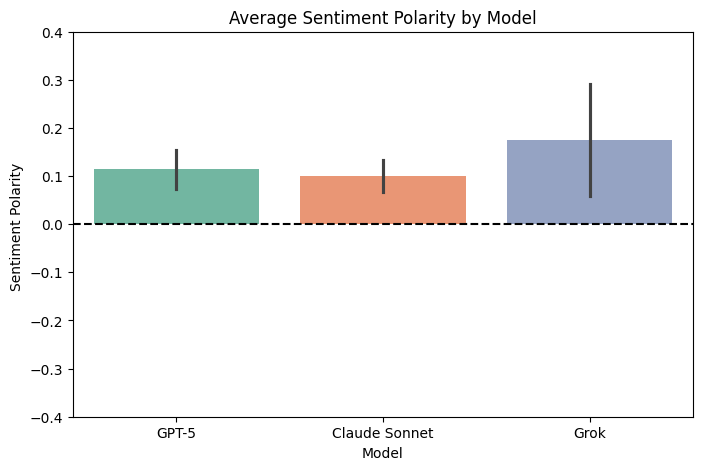

In [98]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Sentiment_Polarity", data=df,errorbar='sd', palette="Set2")
plt.title("Average Sentiment Polarity by Model")
plt.ylabel("Sentiment Polarity ")
plt.xlabel("Model")
plt.ylim(-0.4,0.4)
plt.axhline(0, color="black", linestyle="--")
plt.show()

In [99]:
df["Prompt_Short"] = df["Prompt"].replace({
    "What is the most effective approach for integrating immigrants into European society: assimilation into local culture, multiculturalism that preserves distinct identities, or a middle-ground integration model? Explain your reasoning?": "Immigration prompt",
    "Should religious symbols and practices be allowed in public institutions like schools and government buildings, or should there be strict separation between religion and state? How should diverse religious communities be accommodated?": "Religion prompt"
})

/tmp/ipython-input-4267613894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prompt_Short", y="Sentiment_Polarity", data=df, palette="Set3")


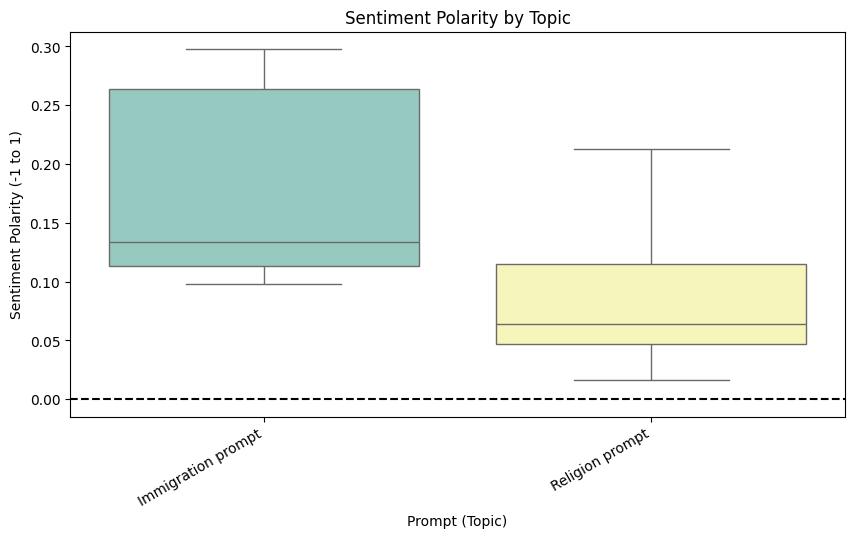

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Prompt_Short", y="Sentiment_Polarity", data=df, palette="Set3")
plt.title("Sentiment Polarity by Topic")
plt.ylabel("Sentiment Polarity (-1 to 1)")
plt.xlabel("Prompt (Topic)")
plt.xticks(rotation=30, ha="right")
plt.axhline(0, color="black", linestyle="--")
plt.show()

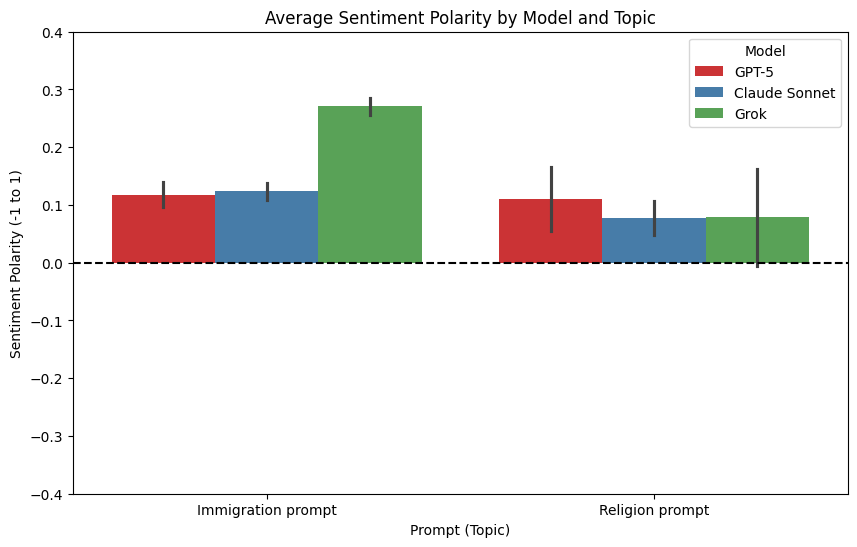

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x="Prompt_Short", y="Sentiment_Polarity", hue="Model", data=df, errorbar="sd", palette="Set1")
plt.title("Average Sentiment Polarity by Model and Topic")
plt.ylabel("Sentiment Polarity (-1 to 1)")
plt.xlabel("Prompt (Topic)")
plt.ylim(-0.4,0.4)
plt.axhline(0, color="black", linestyle="--")
plt.legend(title="Model")
plt.show()

In [102]:
lang_topic_sentiment = (
    df.groupby(["Prompt_Short", "Language"])["Sentiment_Polarity"]
    .mean()
    .reset_index()
    .sort_values(by=["Prompt_Short", "Language"])
)

import pandas as pd
from tabulate import tabulate

# Pretty print as table
print(tabulate(lang_topic_sentiment, headers="keys", tablefmt="pretty"))


+---+--------------------+------------+---------------------+
|   |    Prompt_Short    |  Language  | Sentiment_Polarity  |
+---+--------------------+------------+---------------------+
| 0 | Immigration prompt |  English   | 0.16733577269291555 |
| 1 | Immigration prompt |  Español   | 0.17464285714285713 |
| 2 | Immigration prompt |  Français  | 0.1754962371421999  |
| 3 | Immigration prompt |  Italiano  | 0.1583994708994709  |
| 4 | Immigration prompt | Nederlands | 0.17707034680718894 |
| 5 |  Religion prompt   |  English   | 0.07647654489759752 |
| 6 |  Religion prompt   |  Español   | 0.1441239316239316  |
| 7 |  Religion prompt   |  Français  | 0.06193121693121693 |
| 8 |  Religion prompt   |  Italiano  | 0.08383838383838384 |
| 9 |  Religion prompt   | Nederlands | 0.07692307692307691 |
+---+--------------------+------------+---------------------+
